In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
files = glob.glob('data-to-use/*.csv')

Pass in user file, return df for that user

In [69]:
def create_user_df(file):
    return pd.read_csv(file)

Method to return data from a given month in 2020. This is reliant on the df that is set in the above cell

In [72]:
def retrun_month_df(df,monthInt): 
    df_youtube_data_month = df[(df['years'] == 2020) & (df['months'] == monthInt) &(df['source'] == 'youtube') ]
    df_youtube_data_month['datetime'] = pd.to_datetime(df_youtube_data_month.datetime)
    df_youtube_data_month = df_youtube_data_month.sort_values(by='datetime',ascending =True).reset_index()
    #print("Dataframe Size for month #"+str(monthInt)+": "+str(df_youtube_data_month.shape[0]))
    return df_youtube_data_month

Method to return a list of the trails found in the passed in dataframe. A trail is currently considered a series of videos watched in a row, with no searches between, and at maximum 10 minutes spent between watching each video, ontop of the duration of the video

In [5]:
def create_trail_list(month_df):
    trails = []
    current_trail = []
    for index, row in month_df.iterrows():
        if row['action'] == "Searched":
            trails.append(current_trail)
            current_trail = [row]
        else:
            if len(current_trail) == 0:
                current_trail.append(row)
            else:
                eventTimeDif = (row.datetime - current_trail[-1].datetime).seconds
                if (pd.notnull(current_trail[-1].durations)):
                    difComp = int(current_trail[-1].durations) + (60*10)
                else:
                    difComp = (60*10)
                if (current_trail[-1]['action'] == "Searched" and eventTimeDif < (60 * 10)) or (eventTimeDif < difComp):
                    current_trail.append(row)
                else:
                    trails.append(current_trail)
                    current_trail = [row]   
    if len(current_trail) > 1:
        trails.append(current_trail)
    return trails

Print out some core details on the list of trails that are passed in

In [59]:
def create_month_report(trailsList):
    longest = 0
    count_five = 0
    count = 0
    total_length = 0
    for trail in trailsList:
        if len(trail) > longest:
            longest = len(trail)
        if len(trail) > 4:
            count_five += 1
        if len(trail) > 1:
            count += 1
            total_length += len(trail)
    print("Number of Trails: "+ str(count))
    print("Number of Trails of Length Greater then 5: "+ str(count_five))
    print("Longest Trail: "+ str(longest))
    print("Average path length: "+str(total_length/count))

Generate a dictonary which contains the mean trail distance for that date

In [78]:
def generate_trail_means(trails):
    trailsByDate = {}
    meanByDate = {}
    for trail in trails:
        if trail[0]['datetime'] in list(trailsByDate.keys()):
            trailsByDate[trail[0]['datetime']].append(trail)
        else:
            trailsByDate[trail[0]['datetime']] = [trail]
    for date in list(trailsByDate.keys()):
        dateSum = 0
        for trail in trailsByDate[date]:
            dateSum = dateSum + len(trail)
        meanByDate[date] = dateSum/len(trailsByDate[date])
    return meanByDate

Plot the passed in dictonary, originally intended to use this to plot the mean trail

In [77]:
def plot_dic(dic): 
    lists = sorted(dic.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.show()

<ipython-input-72-d50ab5ad5caf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youtube_data_month['datetime'] = pd.to_datetime(df_youtube_data_month.datetime)


Number of Trails: 3332
Number of Trails of Length Greater then 5: 942
Longest Trail: 47
Average path length: 4.387755102040816


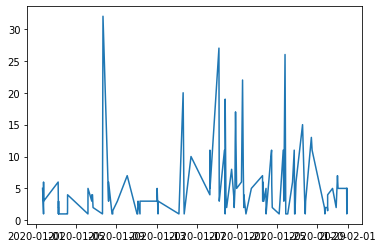

In [79]:
jan_total_trails = []
for f in files:
    user_df = create_user_df(f)
    jan_df = retrun_month_df(user_df,1)
    jan_trails = create_trail_list(jan_df)
    jan_total_trails += jan_trails
create_month_report(jan_total_trails)
meanByDate = generate_trail_means(jan_trails)
plot_dic(meanByDate)

<ipython-input-72-d50ab5ad5caf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youtube_data_month['datetime'] = pd.to_datetime(df_youtube_data_month.datetime)


Number of Trails: 3247
Number of Trails of Length Greater then 5: 999
Longest Trail: 49
Average path length: 4.7342161995688326


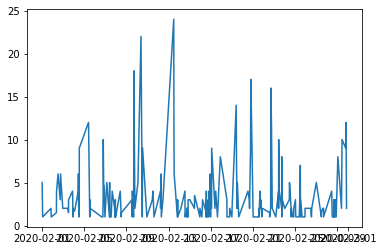

In [80]:
feb_total_trails = []
for f in files:
    user_df = create_user_df(f)
    feb_df = retrun_month_df(user_df,2)
    feb_trails = create_trail_list(feb_df)
    feb_total_trails += feb_trails
create_month_report(feb_total_trails)
meanByDate = generate_trail_means(feb_trails)
plot_dic(meanByDate)

<ipython-input-72-d50ab5ad5caf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youtube_data_month['datetime'] = pd.to_datetime(df_youtube_data_month.datetime)


Number of Trails: 2242
Number of Trails of Length Greater then 5: 749
Longest Trail: 78
Average path length: 4.922836752899197


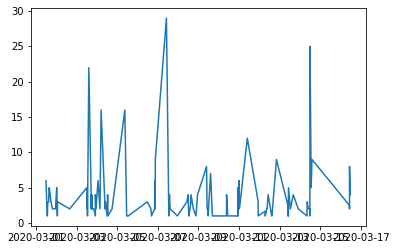

In [83]:
march_total_trails = []
for f in files:
    user_df = create_user_df(f)
    march_df = retrun_month_df(user_df,3)
    march_trails = create_trail_list(march_df)
    march_total_trails += march_trails
create_month_report(march_total_trails)
meanByDate = generate_trail_means(march_trails)
plot_dic(meanByDate)